In [1]:
import numpy as np
import pandas as pd

In [2]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep

Working with 21765 images
Image examples: 
00040.jpg


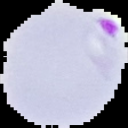

00041.jpg


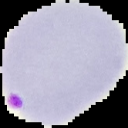

In [3]:
folder = "data-release/train"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder,f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(40, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i]))

In [4]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img, load_img

train_files = []

i=0
for _file in onlyfiles:
    train_files.append(_file)

Using TensorFlow backend.


In [5]:
print("Files in train files: %d" % len(train_files))

Files in train files: 21765


In [6]:
image_width = 128
image_height = 128
channels = 3

dataset = np.ndarray(shape = (len(train_files), image_height, image_width, channels), dtype=np.float32)

In [7]:
dataset.shape

(21765, 128, 128, 3)

In [8]:
i=0
for _file in train_files:
    img = load_img(folder + "/" + _file) # this is a PIL image
    img.thumbnail((image_width, image_height))
    x = img_to_array(img)
    x /= 255
    #x_train = x.astype(float)
    dataset[i] = x
    i+=1
    #print(dataset.shape)

In [26]:
y_train = pd.read_csv("data-release/train_labels.csv")

In [27]:
y_train = y_train.iloc[:,1].values
y_train.astype(float)

array([1., 1., 1., ..., 0., 0., 0.])

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [12]:
#Splitting training dataset into trainning and validation set

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(dataset, y_train, test_size=0.2, random_state=33)

In [13]:
print("Train set size {0}, Val set size {1}".format(len(X_train), len(X_val)))

Train set size 17412, Val set size 4353


In [14]:
input_shape = (128, 128, 3)
num_classes = 2


model = Sequential()

model.add(Conv2D(64,(3,3), input_shape = (128, 128, 3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), dim_ordering="th"))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

C:\Users\Sbasu26\Documents\Anaconda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  


In [15]:
model.fit(X_train,
          y_train,
          batch_size=128,
          epochs=12,
          validation_data=(X_val, y_val))

Train on 17412 samples, validate on 4353 samples
Epoch 1/12
17412/17412 [==============================] - 2666s 153ms/step - loss: 7.9652 - acc: 0.5025 - val_loss: 7.8387 - val_acc: 0.5137
Epoch 2/12
17412/17412 [==============================] - 2495s 143ms/step - loss: 8.0165 - acc: 0.5026 - val_loss: 7.8387 - val_acc: 0.5137
Epoch 3/12
17412/17412 [==============================] - 1747s 100ms/step - loss: 4.6782 - acc: 0.5363 - val_loss: 0.7218 - val_acc: 0.4921
Epoch 4/12
17412/17412 [==============================] - 1650s 95ms/step - loss: 0.6423 - acc: 0.6277 - val_loss: 0.6477 - val_acc: 0.6168
Epoch 5/12
17412/17412 [==============================] - 1627s 93ms/step - loss: 0.5834 - acc: 0.6983 - val_loss: 0.8419 - val_acc: 0.4944
Epoch 6/12
17412/17412 [==============================] - 1700s 98ms/step - loss: 0.4864 - acc: 0.7853 - val_loss: 0.4215 - val_acc: 0.8213
Epoch 7/12
17412/17412 [==============================] - 3566s 205ms/step - loss: 0.3657 - acc: 0.8561 - va

Working with 5793 images
Image examples:
21805.jpg


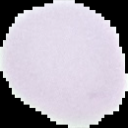

21806.jpg


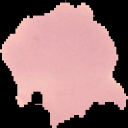

In [16]:
#Test data
testFolder = "data-release/test"

onlyTestFiles = [f for f in os.listdir(testFolder) if os.path.isfile(os.path.join(testFolder, f))]

print("Working with {0} images".format(len(onlyTestFiles)))
print("Image examples:")

for i in range(40, 42):
    print(onlyTestFiles[i])
    display(_Imgdis(filename=testFolder + "/" + onlyTestFiles[i]))

In [17]:
#Preparing Test Files
test_files = []

j=0
for _file in onlyTestFiles:
    test_files.append(_file)

In [18]:
test_dataset = np.ndarray(shape=(len(test_files), image_height, image_width, channels),
                     dtype=np.float32)

In [19]:
j=0
for _file in test_files:
    img_test = load_img("data-release/test/" + _file)
    img_test.thumbnail((image_width, image_height))
    x_test = img_to_array(img_test)
    x_test /= 255
    test_dataset[j] = x_test
    j+=1
    #print(test_dataset.shape)

In [20]:
result = model.predict(test_dataset)

In [23]:
result.to_csv('submission1.csv', sep='\t', encoding='utf-8')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [22]:
print(result)

[[0.10400935 0.89599067]
 [0.00623561 0.9937644 ]
 [0.95521325 0.04478679]
 ...
 [0.04188072 0.9581193 ]
 [0.9845685  0.01543151]
 [0.17238265 0.82761735]]


In [25]:
prediction = pd.DataFrame(result, columns=['result','result1']).to_csv('prediction.csv')